Estimación de estadísticos usando bootstrap
===

* *30 min* | Ultima modificación: Junio 22, 2019

La estimación de la distribución de probabilidades (y sus propiedades) de un estadístico suele ser dificil debido a que solo unos pocos estadísticos siguen una distribución de probabilidades conocida. El bootstrap es un método numérico para realizar está estimación a partir de una muestra de datos. Uno de sus usos más importantes es la estimación del error promedio de pronóstico en modelos predictivos comúnmente usados en analítica.

## Descripción del problema

Se tiene la siguiente muestra de datos, obtenida de un experimento. Se desea estimar la media de la población. 

In [1]:
x = [0.09, 0.15, 0.18, 0.16, 0.23, 0.35, 0.49, 0.68, 0.71, 0.85, 0.96, 0.98, 0.27]

## Conceptos básicos

A continuación se presentan las principales definiciones asociadas al concepto de bootstrap.

![assets/pob-muestra.jpg](assets/pob-muestra.jpg)

**Población**: Colección de objetos o individuos sobre los cuales se desea obtener información de interés.

**Muestra**: Grupo obtenido aleatoriamente que es representativo de la población.

**Parámetro**: Un valor que resume una propiedad o característica de la población entera. 

**Muestreo sin reemplazo**: Cuando una observación es seleccionada ya no está disponible en adelante. 

**Muestreo con reemplazo**: Cada observación es devuelta a la población después de ser seleccionada.

**Muestreo aleatorio**: Muestreo de elementos de forma aleatoria tal que cada miembro de la población tiene igual probabilidad de ser seleccionado.

**Muestreo estratificado**: División de la población en estratos y muestreo aleatorio de cada estrato.

**Muestra aleatoria simple**: Muestra que resulta de muestrear la población sin estratificar.

**Muestra sesgada**: Muestra que no representa la población.

**Sesgo estadístico**: Errores de muestreo o medición que son sistemáticos y producidos por la medición o el muestreo mismo.

**Estadístico**: Un número que resume una propiedad o característica de la muestra. 

**Estadístico muestral**: Una métrica calculada para una muestra de datos obtenida de forma aleatoria de la población.

**Distribución muestral**: Es la distribución de probabilidad de un estadístico muestral calculado sobre muchas muestras o remuestreos.

**Error estándar**: Es la desviación estándar del estadístico muestral sobre muchas muestras.




Para estimar el valor de un parámetro de la población mediante un estadístico calculado sobre la muestra, se deben tener en cuenta alguna de las dos siguientes opciones: 

* Pruebas de hipótesis (se caracterizaron en el módulo de análisis exploratorio).

* Estimación de intervalos de confianza.

El problema abordado aquí radica en que el estadístico calculado (la media de la muestra) es una aproximación al parámetro real de la población (la media de la población); si se obtienen diferentes muestras de datos, y se calcula el estadístico de interés, se obtendrán distintos valores (distintas medias); entonces, la pregunta es cómo aproximar la media de la población a partir de la muestra de datos. Esta es la utilidad del bootstrapping. 

## Bootstrapping

### Definición

El bootstrap se usa cuando no es posible derivar ecuaciones que permitan aproximar la distribución de probabilidades de un estadístico. El bootstrap se basa en el remuestreo de los datos para poder obtener una muestra del estadístico que se está calculado. 

Suponga que tiene una muestra de ocho ejemplos:

$$\{x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8\}$$

Una muestra bootstap se obtiene de la muestra original, seleccionando ocho elementos de forma aleatoria con reemplazo. Por ejemplo, una muestra bootstrap podría ser:

$$\{x_1, x_2, x_2, x_2, x_4, x_1, x_7, x_7\}$$

Nóte que los elementos pueden repetirse. Sobre cada muestra bootstrap obtenida, se realiza el proceso de cómputo y se obtiene el estadístico de interés. Si este procedimiento se repite, por ejemplo, 500 veces para calcular el estadístico de interés, se tendrían 500 valores posibles de éste. Así, una estimación mucho mejor del valor del estadístico, sería calcular su valor promedio a partir de la muestra de 500 valores. Más aún, podría calcularse el histograma o la distribución de probabilidades de dicho estadístico, lo cual es mucho más informativo.

### Algoritmo bootstrap no paramétrico

* Se tiene la muestra $x=\{x_i; 1,...,n\}$


* Se seleccionan $B$ muestras bootstrap independientes $x^{*1}, ..., x^{*B}$ cada una de $n$ elementos obtenidos de la muestra original.


* Para cada muestra bootstap se calcula el estadístico de interes: $\theta(b) = t(x^{*b})$


* La muestra $\theta(1), ..., \theta(B)$ representa la distribución de probabilidades de $\theta$ y puede calcularsele valor esperado, desviación estándar, etc.

* El error estándar se puede calcular como:

$$\text{se}_B = \left\{
\frac{1}{B-1} \sum_{b=1}^B \left[\theta(b) - \bar{\theta}(\bullet) \right]^2
\right\}^{(1/2)}$$

$$
\bar{\theta}(\bullet) = \frac{1}{B} \sum_{b=1}^B \theta (b)$$

## Cómputo en Python

A continuación se presenta la solución del problema usando Python.

In [2]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.utils import resample

%matplotlib inline

%load_ext rpy2.ipython

In [3]:
#
# La función resample permite hacer un muestreo con reemplazo.
#
boot = resample(
    x,  # muestra
    replace=True,  # reemplazo?
    n_samples=len(x),  # longitud de la nueva muestra
    random_state=None,
)  # generador de aleatorios

boot

[0.85, 0.18, 0.16, 0.35, 0.98, 0.16, 0.96, 0.09, 0.18, 0.15, 0.35, 0.68, 0.27]

In [4]:
##
## Se generan 500 muestras bootstrap
##
sample = [resample(x, replace=True, n_samples=len(x)) for _ in range(500)]
sample[0:2]

[[0.15,
  0.09,
  0.96,
  0.98,
  0.16,
  0.15,
  0.96,
  0.27,
  0.71,
  0.27,
  0.85,
  0.23,
  0.85],
 [0.35,
  0.23,
  0.35,
  0.49,
  0.09,
  0.68,
  0.09,
  0.49,
  0.16,
  0.96,
  0.15,
  0.68,
  0.09]]

In [5]:
#
# Se computa la media para cada muestra bootstrap
#
stat = [np.mean(s) for s in sample]
stat[0:5]

[0.5099999999999999,
 0.37,
 0.563076923076923,
 0.4623076923076923,
 0.4515384615384616]

In [6]:
#
# Estimado de la media de la población
#
np.mean(stat)

0.46784461538461536

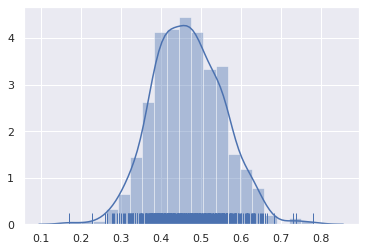

In [7]:
#
# Histograma de las medias calculadas
#
sns.set(color_codes=True)
sns.distplot(stat, rug=True)
plt.show()

In [8]:
#
# Error estándar (desviación estándar) para
# el valor computado de la media
#
np.std(stat)

0.0865087018778557

### Distribución de probabilidades del estadístico boostrap

Se obtiene aplicando el teorema del Límite Central.

Si $s_1$, ..., $s_n$ es una muestra aleatoria donde las observaciones $s_i$ son independientes e identicamente distribuidas de una distribución con media $\mu$ y varianza finita $\sigma^2$, entonces:

$$\bar{s} = \frac{1}{n} \sum_{i=1}^n s_i$$

sigue una distribución normal con media $\mu$ y varianza $(\sigma_{\bar{s}})^2 = \sigma^2 / n$.

Note que no se hace ningún supuesto sobre la distribución que siguen las observaciones $s_i$

En este caso, la muestra $s_i$ es una de las muestras bootstrap obtenidas arriba.

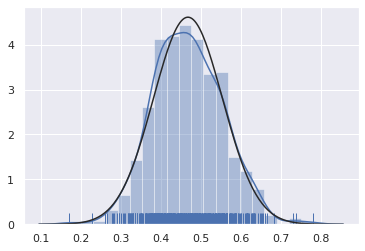

In [9]:
#
# Distribución normal teórica
#
sns.set(color_codes=True)
sns.distplot(stat, rug=True, fit=stats.norm)
plt.show()

In [10]:
#
# Intervalos de confianza para +/- 2 sigma
# aprox el 95% de confianza
#
[np.mean(stat) - 2 * np.std(stat), np.mean(stat) + 2 * np.std(stat)]

[0.29482721162890396, 0.6408620191403267]

## Jacknife

Se obtiene al dejar un solo elemento fuera de la muestra de datos.


* Se tiene la muestra $x=\{x_i; 1,...,n\}$


* Se calcula el estadístico de interes: $\theta(b) = t(x)$


* Se obtienen $n$ muestras jackknife $x_{(i)}$, $i=1, ...,n$, donde:

$$x_{(i)} = (x_1, \; x_2, \; ..., \; x_{i-1}, \; x_{i+1}, \; ..., \; x_n)$$


* Se calcula el estadístico para la muestra jackknife:

$$\theta_{(i)} = t(x_{(i)})$$


* El error estándar se obtiene como:

$$\text{se}_{\text{jack}} = \left\{
\frac{n-1}{n} \sum_{i=1}^n \left[   \theta_{(i)} - \theta_{(\bullet)}  \right]^2
\right\}^{1/2}$$

$$
\bar{\theta}(\bullet) = \frac{1}{n} \sum_{i=1}^n \theta_{(i)}$$

**Actividad.---** Estime la media de la población usando Jacknife.

## Anexo --- Cómputo en R

In [11]:
%%R 
library(boot)                             ## se carga la librería

x <- c(0.09, 0.15, 0.18, 0.16, 0.23, 0.35, 0.49, 0.68, 0.71, 0.85, 0.96, 0.98, 0.27)

mean_est <- boot(x,                       ## se realiza la estimación de la media con 500 repeticiones
                 function(x,i) mean(x[i]), 
                 R=500)

mean(mean_est$t[,1])  

[1] 0.4728077


In [12]:
%%R
#
# Se calculan los intervalos de confianza
#
boot.ci(
    mean_est,  # se utiliza la función boot.ci para estimar los intervalos de confianza
    conf=0.95,  # con una confianza del 95%
    type=c("basic"),
)  # se seleccionan intervalos básicos

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 500 bootstrap replicates

CALL : 
boot.ci(boot.out = mean_est, conf = 0.95, type = c("basic"))

Intervals : 
Level      Basic         
95%   ( 0.2924,  0.6345 )  
Calculations and Intervals on Original Scale
